In [11]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.colors
import datetime
from datetime import timedelta

In [36]:
def time_converter(data):
    return datetime.datetime.strptime(data, '%Y-%m-%d %H:%M:%S')

def convert_to_minutes(data):
    return data.seconds/60

In [37]:
df = pd.read_csv('/home/jovyan/work/repos/hpc_stats/MiraANL-ALCF-DJC-MIRA_20180101_20181231.csv',
                 delimiter=',')
df["TIME_REQUESTED"] = df['REQUESTED_CORE_HOURS']/df["CORES_REQUESTED"]
df["WAIT_TIME"] = df.START_TIMESTAMP.apply(time_converter) - df.QUEUED_TIMESTAMP.apply(time_converter)
df["WAIT_TIME"] = df.WAIT_TIME.apply(convert_to_seconds)
df.head()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,IS_MULTILOCATION_ONLY,IS_MULTILOCATION_SUBBLOCK,IS_CONSECUTIVE_ONLY,IS_SINGLE_ONLY,IS_NO_TASKS,IS_OTHER,OVERBURN_CORE_HOURS,IS_OVERBURN,TIME_REQUESTED,WAIT_TIME
0,1364194.mira,1364194,mira,2017-12-29 15:46:35,20171229,2017-12-31 17:23:16,20171231,2018-01-01 02:51:30,20180101,56878883185274,...,0,0,1,0,0,0,0.0,0,9.470556,5801
1,1364021.mira,1364021,mira,2017-12-28 22:24:45,20171228,2017-12-31 22:42:46,20171231,2018-01-01 04:37:33,20180101,20020028632143,...,0,0,0,1,0,0,0.0,0,5.913333,1081
2,1364195.mira,1364195,mira,2017-12-29 15:46:40,20171229,2017-12-31 17:45:56,20171231,2018-01-01 10:00:14,20180101,56878883185274,...,0,0,1,0,0,0,0.0,0,16.238333,7156
3,1332425.mira,1332425,mira,2017-12-08 02:38:02,20171208,2018-01-01 10:01:23,20180101,2018-01-01 10:05:41,20180101,25289003749046,...,0,0,0,1,0,0,0.0,0,0.071944,26601
4,1341380.mira,1341380,mira,2017-12-15 15:56:19,20171215,2018-01-01 10:07:05,20180101,2018-01-01 10:11:50,20180101,25289003749046,...,0,0,0,1,0,0,0.0,0,0.079167,65446


In [17]:
df.columns

Index(['JOB_NAME', 'COBALT_JOBID', 'MACHINE_NAME', 'QUEUED_TIMESTAMP',
       'QUEUED_DATE_ID', 'START_TIMESTAMP', 'START_DATE_ID', 'END_TIMESTAMP',
       'END_DATE_ID', 'USERNAME_GENID', 'PROJECT_NAME_GENID', 'QUEUE_NAME',
       'WALLTIME_SECONDS', 'RUNTIME_SECONDS', 'NODES_USED', 'NODES_REQUESTED',
       'CORES_USED', 'CORES_REQUESTED', 'LOCATION', 'EXIT_STATUS',
       'ELIGIBLE_WAIT_SECONDS', 'ELIGIBLE_WAIT_FACTOR', 'QUEUED_WAIT_SECONDS',
       'QUEUED_WAIT_FACTOR', 'REQUESTED_CORE_HOURS', 'USED_CORE_HOURS',
       'CAPABILITY_USAGE_CORE_HOURS', 'NONCAPABILITY_USAGE_CORE_HOURS',
       'BUCKETS3_A_USAGE_CORE_HOURS', 'BUCKETS3_B_USAGE_CORE_HOURS',
       'BUCKETS3_C_USAGE_CORE_HOURS', 'MACHINE_PARTITION', 'EXIT_CODE', 'MODE',
       'RESID', 'DATA_LOAD_STATUS', 'CAPABILITY', 'SIZE_BUCKETS3',
       'PERCENTILE', 'NUM_TASKS_SUBBLOCK', 'NUM_TASKS_CONSECUTIVE',
       'NUM_TASKS_MULTILOCATION', 'NUM_TASKS_SINGLE', 'COBALT_NUM_TASKS',
       'IS_SINGLE', 'IS_CONSECUTIVE', 'IS_MULTIL

In [30]:
print(df["NODES_REQUESTED"].min())
print(df["NODES_REQUESTED"].max())
print(df["NODES_REQUESTED"].mean())

1.0
49152.0
1957.3512070847992


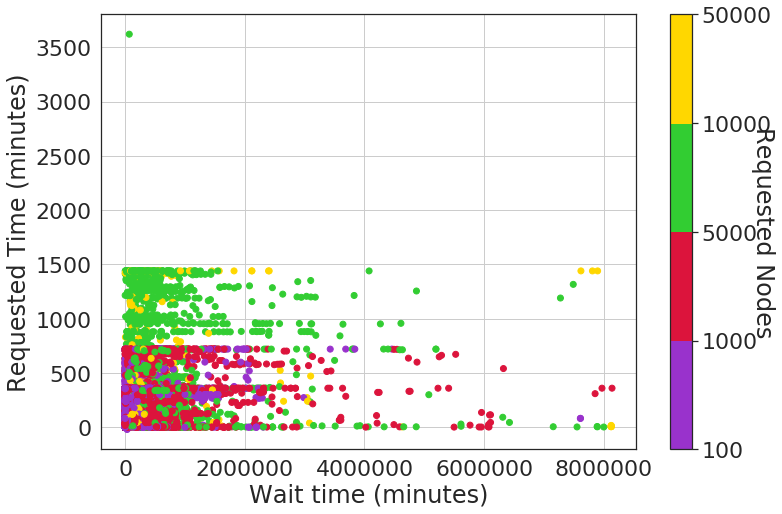

In [51]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))
bounds = [100, 1000, 5000, 10000, 50000]
colors = ["darkorchid", "crimson", "limegreen", "gold"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

sc = ax.scatter(df.QUEUED_WAIT_SECONDS, df.TIME_REQUESTED*60,
                c=df.NODES_REQUESTED.values, cmap=cmap, norm=norm)

cbar = fig.colorbar(sc, spacing="uniform")
cbar.ax.set_ylabel('Requested Nodes', rotation=270)

plt.grid(True)
ax.set_xlabel('Wait time (minutes)')
ax.set_ylabel('Requested Time (minutes)')

#plt.savefig("figures/wait_time_walltime_all.png")
plt.show()

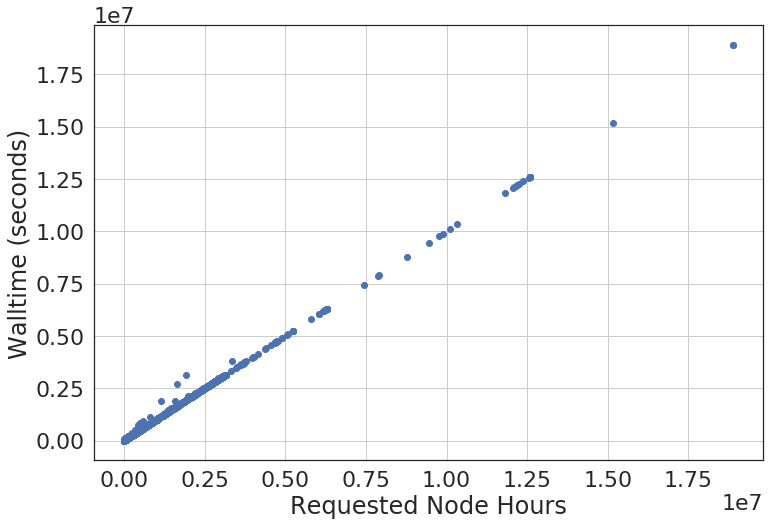

In [47]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))

sc = ax.scatter(df.REQUESTED_CORE_HOURS, df.USED_CORE_HOURS)

plt.grid(True)
ax.set_ylabel('Walltime (seconds)')
ax.set_xlabel('Requested Node Hours')

#plt.savefig("figures/wait_time_walltime_all.png")
plt.show()

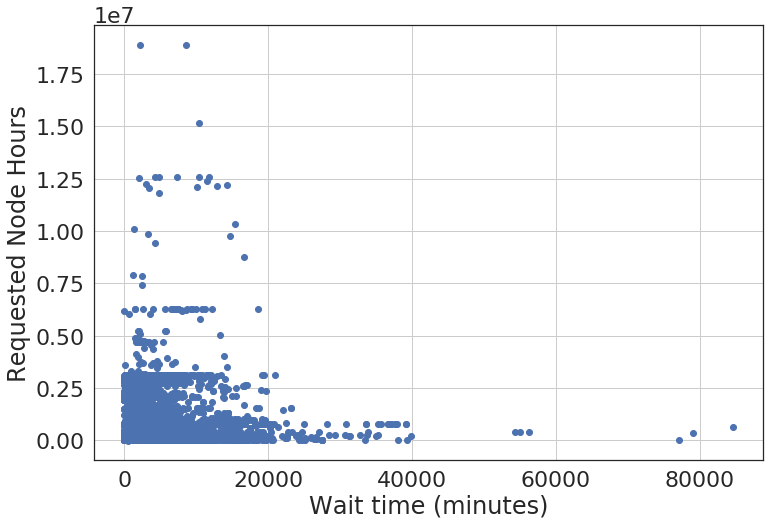

In [50]:
sns.set(font_scale=2)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))

sc = ax.scatter(df.QUEUED_WAIT_SECONDS/60, df.REQUESTED_CORE_HOURS)

plt.grid(True)
ax.set_xlabel('Wait time (minutes)')
ax.set_ylabel('Requested Node Hours')

#plt.savefig("figures/wait_time_walltime_all.png")
plt.show()